# **MÓDULO 15 - Exercício**
# Análise  - A segunda etapa da Pré Modelagem

# 1) O primeiro exercício é o de salvar a base que criaram na atividade do módulo anterior em csv e abrir ela neste arquivo.
Igual fizemos no início do módulo atual no início da primeira aula.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

In [4]:
#Seu código de importação aqui
df = pd.read_csv('Modulo_15.csv', delimiter=',')

# 2) Comece pela análise univariada:

A) Utilize a função describe no seu dataframe, veja os insights que consegue retirar.

B) Já é possível identificar variáveis com possíveis outliers? Se sim, quais?

C) Plot gráficos que considerar importante para completar sua análise univariada. (Lembrando que sua variável preditora é o churn). Não se esqueça de trazer insights de cada gráfico plotado. Utilize pelo menos 4 variáveis distintas.

D) Verifique se os dados das variáveis Booleanas são balanceados ou não.

In [6]:
df.describe()
# (A) - Podemos observar uma quantidade menor de clientes idosos pois temos uma média mais próxima de 0.
# - Metade dos clientes estão há pelo menos 2 anos utilizando os serviços da empresa e temos uma grande variabilidade de dados na coluna Tempo_como_cliente, sugerindo múltipos perfis de clientes. Além de um desvio elevado em relação a média.
# - Na coluna Total_Pago, temos uma mediana abaixo da média e um desvio padrão bem alto, além do valor max estar distante do terceiro quartil, sugerindo que existem alguns clientes com um total muito elevado, puxando a média para cima.
# - A coluna Pagamento_Mensal possui um desvio padrão relativamente alto nos mostrando uma ampla variação de preços. Também nos mostra uma média abaixo da mediana, mostrando que alguns clientes estão em planos mais baratos, o que puxa a média para baixo.´


,Idoso,Tempo_como_Cliente,Pagamento_Mensal,Total_Pago
count,2495.000000,2495.000000,2495.000000,2495.000000
mean,0.161122,32.354309,66.356894,2292.625812
std,0.367717,24.634007,28.013627,2266.888527
min,0.000000,0.000000,18.400000,18.800000
25%,0.000000,8.000000,45.550000,402.175000
50%,0.000000,29.000000,71.450000,1404.650000
75%,0.000000,56.000000,87.375000,3874.750000
max,1.000000,72.000000,118.650000,8564.750000


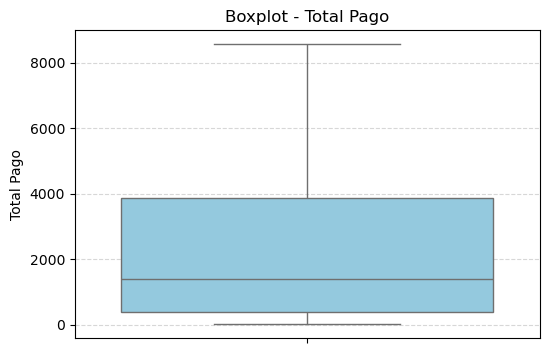

In [28]:
# (B) - Sim, provavelmente há outliers na coluna Total_Pago e possivelmente na coluna Tempo_Como_Cliente
# (C)
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Total_Pago'], color='skyblue')
plt.title('Boxplot - Total Pago')
plt.ylabel('Total Pago')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
# É possível observar um range de valores muito em relação aonde se concentra a maioria de nossos clientes.

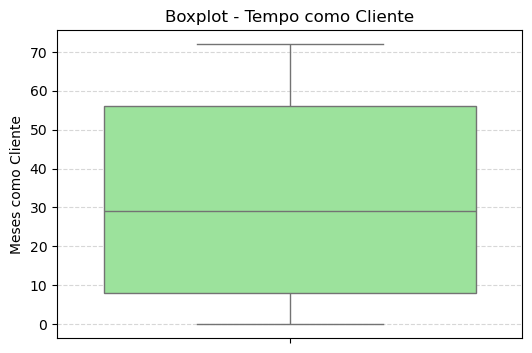

In [30]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Tempo_como_Cliente'], color='lightgreen')
plt.title('Boxplot - Tempo como Cliente')
plt.ylabel('Meses como Cliente')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

/var/folders/mw/__gkkcr136bb5kyjm821yskh0000gn/T/ipykernel_2420/3355049793.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='Total_Pago', palette='Set2')


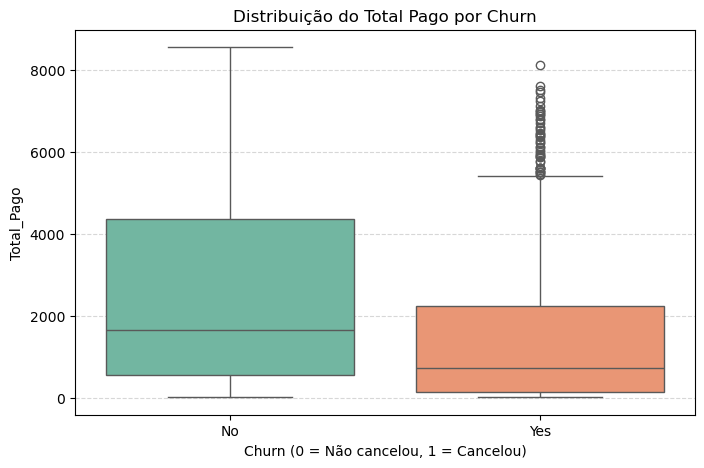

In [34]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Churn', y='Total_Pago', palette='Set2')
plt.title('Distribuição do Total Pago por Churn')
plt.xlabel('Churn (0 = Não cancelou, 1 = Cancelou)')
plt.ylabel('Total_Pago')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()


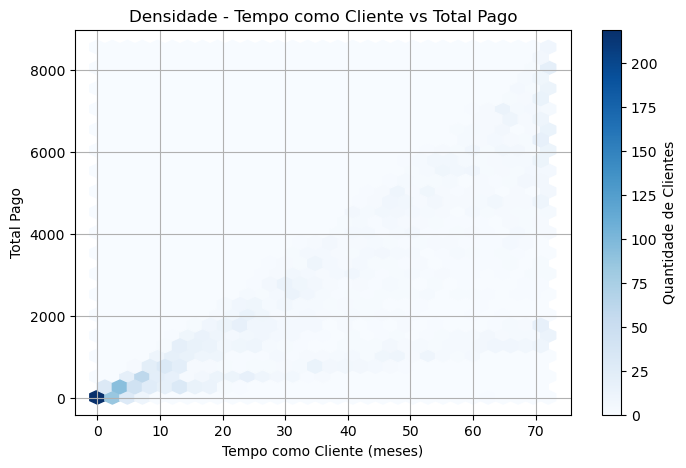

In [36]:
plt.figure(figsize=(8, 5))
plt.hexbin(df['Tempo_como_Cliente'], df['Total_Pago'], gridsize=30, cmap='Blues')
plt.colorbar(label='Quantidade de Clientes')
plt.xlabel('Tempo como Cliente (meses)')
plt.ylabel('Total Pago')
plt.title('Densidade - Tempo como Cliente vs Total Pago')
plt.grid(True)
plt.show()
# A maioria dos clientes fica pouco tempo e paga menos

/var/folders/mw/__gkkcr136bb5kyjm821yskh0000gn/T/ipykernel_2420/1547927496.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Idoso', data=df, palette='Set2')


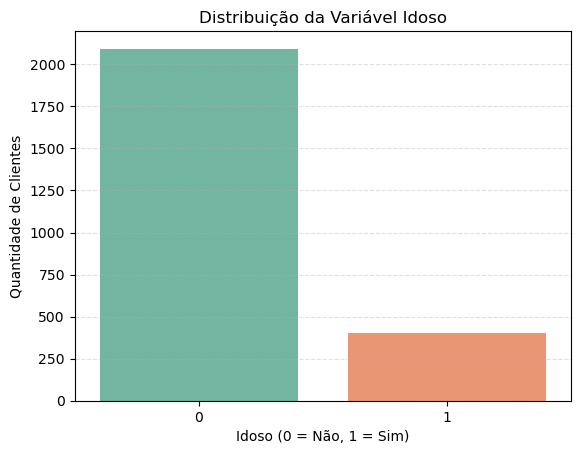

In [38]:
sns.countplot(x='Idoso', data=df, palette='Set2')
plt.title('Distribuição da Variável Idoso')
plt.xlabel('Idoso (0 = Não, 1 = Sim)')
plt.ylabel('Quantidade de Clientes')
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.show()
# (D) Claramente a maioria dos clientes não são idosos. A variável não está balanceada.

# 3) Identifique e trate as colunas que contém outliers.
Caso opte por mante-los ou altera-los justifique sua escolha.


In [29]:
# Irei manter os valores, pois possuímos uma margem, mesmo que pequena em relação ao todo, de clientes que são fiéis e possuem dados importantes para o modelo. Por isso, acabam elevando os valores da coluna Total_Pago que é acumulativa em meses.


# 4) Realize a etapa da análise bivariada:
A) Questione pelo menos 5 informações e traga as respostas utilizando visuais gráficos e insights.


B) Quais variáveis você acredita serem as mais importantes para esse projetos relacionadas a variável Churn?

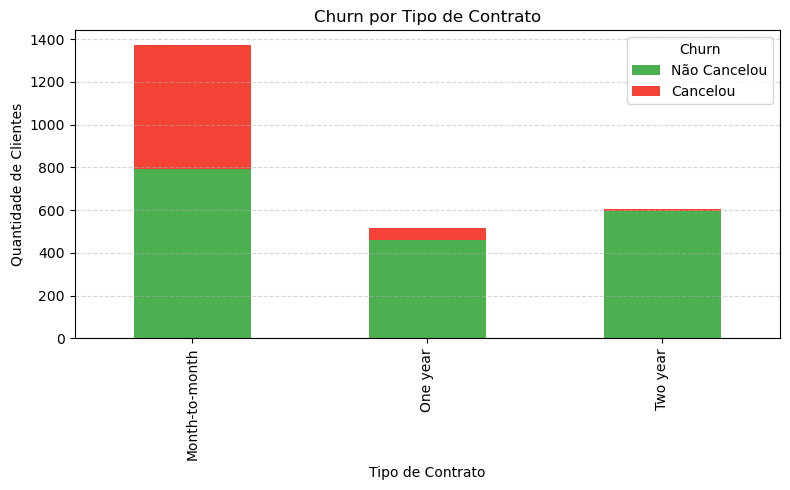

In [42]:
# A
# Tipo de Contrato x Churn
ct = pd.crosstab(df['Tipo_Contrato'], df['Churn'])

ct.plot(kind='bar', stacked=True, color=['#4CAF50','#F44336'], figsize=(8,5))
plt.title('Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Churn', labels=['Não Cancelou', 'Cancelou'])
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
# A maioria dos clientes da base fazem contratos menores (mensal). O contrato de menor duração é o que possui a maior faixa de propensão a cancelamento, apesar de também conter uma proporção maior de clientes que não irão cancelar. Proporcionalmente, contratos maiores tendem a ter menos cancelamento dos clientes.

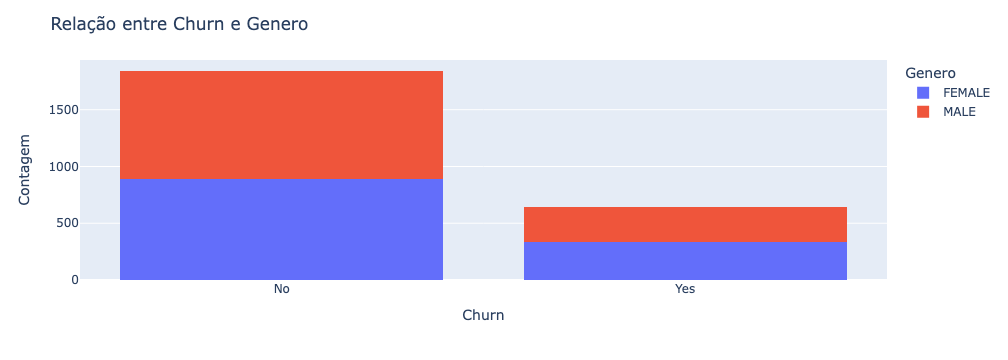

In [50]:
df.head(10)
# Genero x Churn
fig = px.histogram(df, x='Churn', color='Genero', barmode='stack')
fig.update_layout(title='Relação entre Churn e Genero',
                  xaxis_title='Churn',
                  yaxis_title='Contagem',
                  legend_title='Genero')
fig.show()
# Equilíbrio de valores

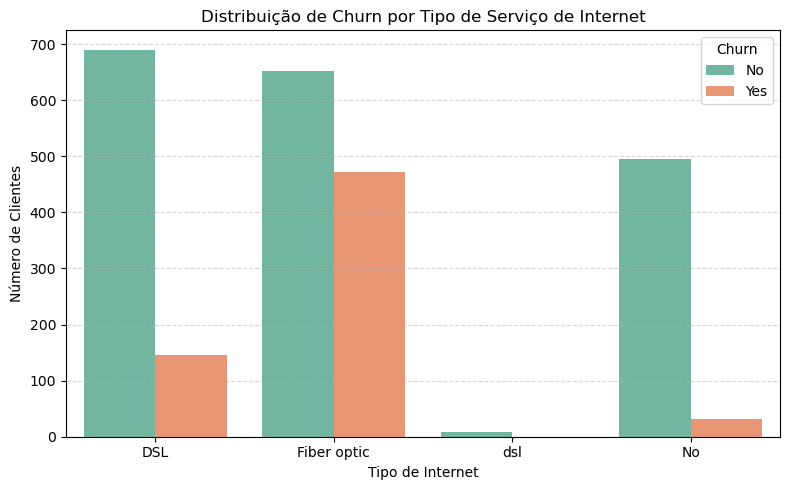

In [65]:
# Serviço de internet x Churn
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Servico_Internet', hue='Churn', palette='Set2')

plt.title("Distribuição de Churn por Tipo de Serviço de Internet")
plt.xlabel("Tipo de Internet")
plt.ylabel("Número de Clientes")
plt.legend(title="Churn")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
# Os clientes costumam optar mais pelo DSL e Fibra óptica. Vale observar a qualidade da fibra óptica que possui um número alto de churn. Porém as outras variáveis podem estar influenciando nesse dado, o que não modifica a importância de merecer uma atenção especial para o serviço de internet com fibra optica.

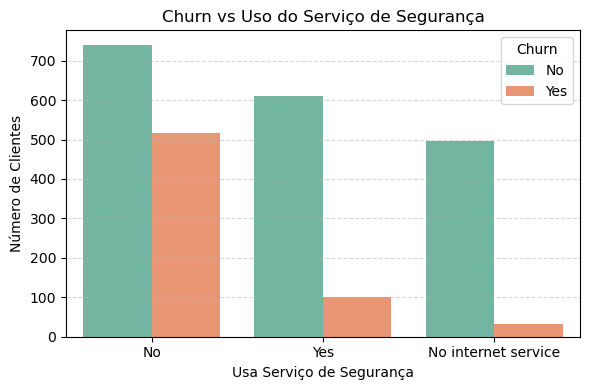

In [69]:
# Serviço de Segurança x Churn
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Servico_Seguranca', hue='Churn', palette='Set2')

plt.title("Churn vs Uso do Serviço de Segurança")
plt.xlabel("Usa Serviço de Segurança")
plt.ylabel("Número de Clientes")
plt.legend(title="Churn")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
# Clientes que contratam o serviço de segurança possuem uma maior probabilidade de não darem churn

/var/folders/mw/__gkkcr136bb5kyjm821yskh0000gn/T/ipykernel_2420/578632631.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




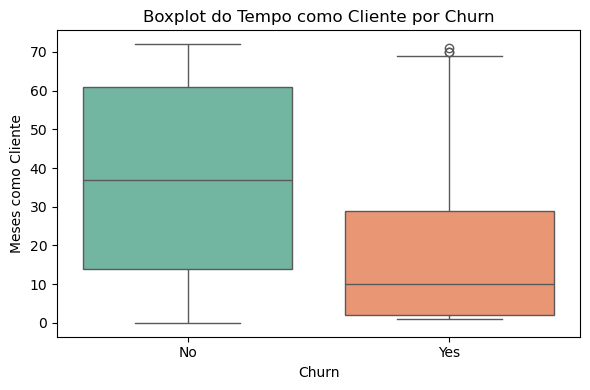

In [73]:
# Clientes mais recentes tem uma probabilidade maior de dar churn, o que valeria uma promoção especial para clientes recentes.
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Churn', y='Tempo_como_Cliente', palette='Set2')

plt.title("Boxplot do Tempo como Cliente por Churn")
plt.xlabel("Churn")
plt.ylabel("Meses como Cliente")
plt.tight_layout()
plt.show()

In [ ]:
# Para mim, as variáveis mais importantes são: Churn, Tempo_como_Cliente, Servico_internet, Tipo_Contrato e Total_Pago